# Foundations of Natural Language Processing and Classical Language Models

## Learning Objectives

By the end of this lecture, students will be able to:
1. Understand the basic concepts and challenges of Natural Language Processing
2. Explain key text preprocessing techniques
3. Describe and implement statistical language models
4. Understand n-gram models and their limitations
5. Apply basic NLP techniques using Python libraries

## 1. Introduction to Natural Language Processing

Natural Language Processing (NLP) is a field at the intersection of computer science, artificial intelligence, and linguistics focused on enabling computers to understand, interpret, and generate human language. It forms the foundation for all language technologies we use today, from search engines to voice assistants and modern large language models.

### Why is NLP Challenging?

Human language is:

- **Ambiguous**: Words and sentences can have multiple interpretations
  - **Lexical ambiguity**: When a word has multiple meanings
    - Example: "The bank is closed" (financial institution or riverbank)
    - Example: "She couldn't bear the pain" (tolerate or give birth to)
    - Example: "The pitcher broke after falling" (container or baseball player)
    - Computational challenge: Systems must select the correct word sense from multiple possibilities
  
  - **Syntactic ambiguity**: When a sentence can be parsed in multiple ways
    - Example: "I saw the man with the telescope" (Who has the telescope?)
    - Example: "Flying planes can be dangerous" (The act of flying planes or planes that are flying?)
    - Example: "Time flies like an arrow" (Multiple possible grammatical structures)
    - Computational challenge: Models must determine the correct grammatical structure
  
  - **Semantic ambiguity**: When the meaning of a sentence has multiple interpretations
    - Example: "Every student took a different course" (Each student took one course, and no two students took the same course? Or each student took multiple courses that differed from their own other courses?)
    - Example: "The chicken is ready to eat" (Ready to be eaten or ready to consume food?)
    - Example: "John and Mary got married last year" (To each other or to other people?)
    - Computational challenge: Systems must infer the intended meaning based on context
  
  - **Pragmatic ambiguity**: When the intended meaning depends on context, intent, or implied information
    - Example: "It's cold in here" (Statement of fact or request to close a window/turn up heat?)
    - Example: "Do you know what time it is?" (Yes/no question or request for the time?)
    - Example: "Could you pass the salt?" (Question about ability or request for action?)
    - Computational challenge: Models must understand communicative intent beyond literal meaning

### NLP Techniques and Applications

NLP encompasses a wide range of techniques and applications that work together to process and understand language:

#### Fundamental NLP Techniques

1. **Tokenization**: Breaking text into words, phrases, or other meaningful elements
   - Word tokenization: Splitting "I love NLP." into ["I", "love", "NLP", "."]
   - Subword tokenization: Breaking words into meaningful pieces (e.g., "playing" → ["play", "##ing"])
   - Character tokenization: Splitting text into individual characters

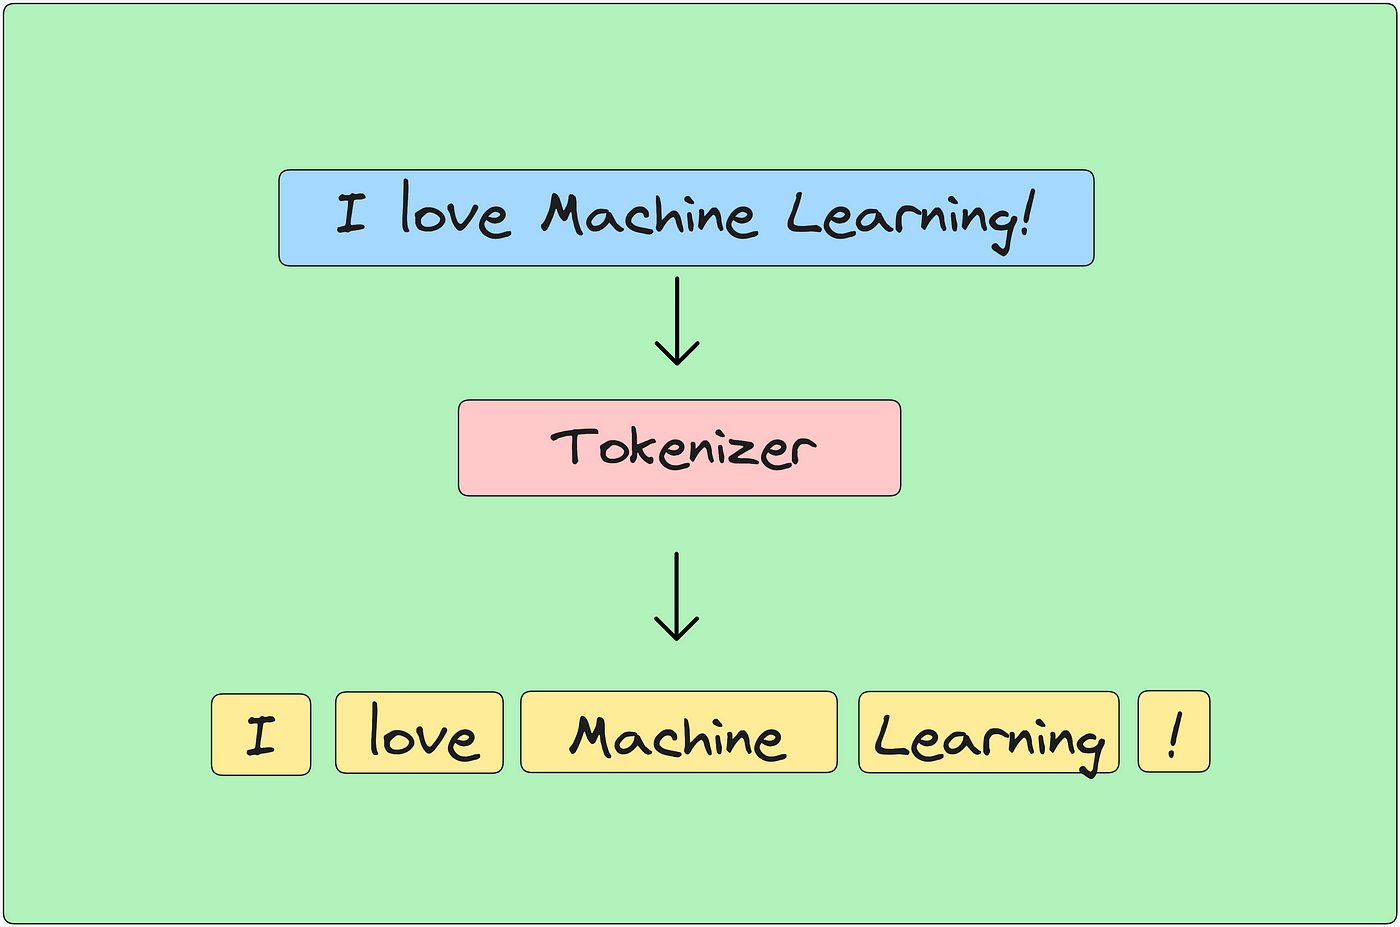

<div style="text-align: center;">
    <img src="https://raw.githubusercontent.com/msfasha/307304-Data-Mining/main/images/regression_1.png" alt="Regression Measures" width="600"/>
</div>

2. **Part-of-speech (POS) tagging**: Identifying whether words are nouns, verbs, adjectives, etc.
   - "The quick brown fox jumps" → [Determiner, Adjective, Adjective, Noun, Verb]
   - Critical for understanding grammatical structure and word meaning in context

3. **Named Entity Recognition (NER)**: Identifying proper nouns like people, organizations, locations
   - "Apple is releasing a new iPhone in San Francisco" → [Organization, Product, Location]
   - Useful for extracting key information from unstructured text

4. **Parsing**: Analyzing grammatical structure of sentences
   - Constituency parsing: Constructing phrase structure trees
   - Dependency parsing: Identifying grammatical relationships between words
   - Semantic parsing: Mapping sentences to formal meaning representations

5. **Coreference resolution**: Determining when different words refer to the same entity
   - "John said he was tired" → "he" refers to "John"
   - Essential for understanding relationships across sentences



#### Common NLP Applications

1. **Sentiment analysis**: Determining the emotional tone of text
   - Identifying if customer reviews are positive, negative, or neutral
   - Tracking public opinion on products, services, or topics

2. **Machine translation**: Translating text between languages
   - Converting text from one language to another while preserving meaning
   - Handling cultural and linguistic differences across languages

3. **Text generation**: Creating human-like text
   - Automatic summarization of longer documents
   - Creative writing assistance and content creation
   - Dialogue systems for conversational AI

4. **Question answering**: Providing answers to natural language questions
   - Extracting answers from documents or knowledge bases
   - Understanding user intent and providing relevant information

5. **Information extraction**: Identifying and extracting structured information from text
   - Pulling key data points from unstructured documents
   - Converting text documents into structured databases

6. **Text classification**: Categorizing text into predefined categories
   - Sorting emails into spam/not spam
   - Organizing documents by topic or content type

Understanding these techniques and applications provides the foundation for studying language models, which combine these elements to create systems that can comprehend and generate human language at increasingly sophisticated levels.

## 2. Text Preprocessing

Before building language models, we need to prepare and clean text data through several preprocessing steps:

### Tokenization

Splitting text into meaningful units (typically words or subwords).

```python
# Simple word tokenization
sentence = "Large language models are revolutionizing business applications."
tokens = sentence.split()
print(tokens)
# Output: ['Large', 'language', 'models', 'are', 'revolutionizing', 'business', 'applications.']

# Using NLTK for more sophisticated tokenization
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

tokens = word_tokenize(sentence)
print(tokens)
# Output: ['Large', 'language', 'models', 'are', 'revolutionizing', 'business', 'applications', '.']
```

### Normalization

Converting text to a standard form to reduce variability:

```python
# Lowercasing
normalized_tokens = [token.lower() for token in tokens]
print(normalized_tokens)
# Output: ['large', 'language', 'models', 'are', 'revolutionizing', 'business', 'applications', '.']

# Removing punctuation
import re
normalized_tokens = [re.sub(r'[^\w\s]', '', token.lower()) for token in tokens]
print(normalized_tokens)
# Output: ['large', 'language', 'models', 'are', 'revolutionizing', 'business', 'applications', '']
```

### Stopword Removal

Eliminating common words that add little meaning:

```python
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
filtered_tokens = [token for token in normalized_tokens if token and token not in stop_words]
print(filtered_tokens)
# Output: ['large', 'language', 'models', 'revolutionizing', 'business', 'applications']
```

### Stemming and Lemmatization

Reducing words to their root forms:

```python
# Stemming
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]
print(stemmed_tokens)
# Output: ['larg', 'languag', 'model', 'revolution', 'busi', 'applic']

# Lemmatization
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
print(lemmatized_tokens)
# Output: ['large', 'language', 'model', 'revolutionizing', 'business', 'application']
```

## 3. Representing Text: Bag of Words and TF-IDF

### Bag of Words (BoW)

A simple way to represent text as numerical vectors by counting word occurrences:

```python
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
    "Large language models revolutionize business.",
    "Business applications benefit from AI.",
    "Language models learn from text data."
]

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names_out())
# Output: ['ai', 'applications', 'benefit', 'business', 'data', 'from', 'language', 'large', 'learn', 'models', 'revolutionize', 'text']

print(X.toarray())
# Output: 
# [[0 0 0 1 0 0 1 1 0 1 1 0]
#  [1 1 1 1 0 1 0 0 0 0 0 0]
#  [0 0 0 0 1 1 1 0 1 1 0 1]]
```

### Term Frequency-Inverse Document Frequency (TF-IDF)

A more sophisticated approach that weights terms based on their importance:

```python
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(corpus)
print(tfidf_vectorizer.get_feature_names_out())
# Same output as above

print(X_tfidf.toarray())
# Output will be a matrix of TF-IDF scores
```

## 4. Classical Language Models: N-grams

N-gram models were among the earliest statistical language models, predicting the probability of a sequence of words by analyzing patterns in training data.

### What are N-grams?

N-grams are contiguous sequences of n items (words, characters, etc.) from a text:
- **Unigrams**: Single words (e.g., "language")
- **Bigrams**: Two consecutive words (e.g., "language models")
- **Trigrams**: Three consecutive words (e.g., "large language models")

### Implementing N-grams

```python
from nltk.util import ngrams

text = "Large language models are transforming how businesses operate"
tokens = word_tokenize(text.lower())

# Generate bigrams
bigrams_list = list(ngrams(tokens, 2))
print(bigrams_list)
# Output: [('large', 'language'), ('language', 'models'), ('models', 'are'), ('are', 'transforming'), ('transforming', 'how'), ('how', 'businesses'), ('businesses', 'operate')]

# Generate trigrams
trigrams_list = list(ngrams(tokens, 3))
print(trigrams_list)
# Output: [('large', 'language', 'models'), ('language', 'models', 'are'), ('models', 'are', 'transforming'), ('are', 'transforming', 'how'), ('transforming', 'how', 'businesses'), ('how', 'businesses', 'operate')]
```

### Building a Simple N-gram Language Model

```python
import random
from collections import defaultdict

def build_ngram_model(text, n=2):
    """Build an n-gram language model from text."""
    tokens = word_tokenize(text.lower())
    ngrams_dict = defaultdict(list)
    
    # Create dictionary of n-grams and possible next words
    for i in range(len(tokens) - n):
        current_ngram = tuple(tokens[i:i+n])
        next_word = tokens[i+n]
        ngrams_dict[current_ngram].append(next_word)
    
    return ngrams_dict

def generate_text(model, seed, length=20):
    """Generate text using the n-gram model."""
    current = seed
    result = list(seed)
    
    for _ in range(length):
        if current in model:
            # Randomly select a possible next word
            next_word = random.choice(model[current])
            result.append(next_word)
            # Update current n-gram
            current = current[1:] + (next_word,)
        else:
            # If current n-gram is not in model, break
            break
    
    return ' '.join(result)

# Sample text corpus
corpus = """Large language models are transforming how businesses operate. 
These models can understand language, generate text, and perform various tasks. 
Businesses use language models for customer service, content creation, and data analysis.
Language models learn patterns from vast amounts of text data."""

# Build a bigram model
bigram_model = build_ngram_model(corpus, 2)

# Generate text using the model
seed = ('language', 'models')
generated_text = generate_text(bigram_model, seed)
print(generated_text)
# Output might be: "language models learn patterns from vast amounts of text data businesses use language models for customer service content creation and data analysis"
```

### Limitations of N-gram Models

1. **Limited context**: Only consider a fixed number of previous words
2. **Data sparsity**: Many valid word combinations don't appear in training data
3. **No semantic understanding**: Model captures statistical patterns but not meaning
4. **Memory intensive**: Storing all possible n-grams requires significant space
5. **No long-range dependencies**: Cannot capture relationships between distant words

## 5. Smoothing Techniques

To address data sparsity in n-gram models, smoothing techniques redistribute probability mass to unseen events:

### Laplace (Add-One) Smoothing

```python
def build_bigram_model_with_smoothing(text):
    """Build a bigram model with Laplace smoothing."""
    tokens = word_tokenize(text.lower())
    # Count word frequencies
    unigram_counts = defaultdict(int)
    bigram_counts = defaultdict(int)
    
    for i in range(len(tokens)):
        unigram_counts[tokens[i]] += 1
        if i < len(tokens) - 1:
            bigram = (tokens[i], tokens[i+1])
            bigram_counts[bigram] += 1
    
    # Calculate probabilities with smoothing
    vocab_size = len(unigram_counts)
    bigram_model = {}
    
    for bigram, count in bigram_counts.items():
        # P(w2|w1) = (count(w1,w2) + 1) / (count(w1) + V)
        w1 = bigram[0]
        bigram_model[bigram] = (count + 1) / (unigram_counts[w1] + vocab_size)
    
    return bigram_model, unigram_counts, vocab_size

# Build model with smoothing
model, unigram_counts, vocab_size = build_bigram_model_with_smoothing(corpus)

# Calculate probability of a bigram
def get_bigram_probability(model, unigram_counts, vocab_size, w1, w2):
    """Get the probability of a bigram with smoothing."""
    if (w1, w2) in model:
        return model[(w1, w2)]
    else:
        # For unseen bigrams
        return 1 / (unigram_counts[w1] + vocab_size)

# Example probability
prob = get_bigram_probability(model, unigram_counts, vocab_size, 'language', 'models')
print(f"P(models|language) = {prob:.4f}")
```

## 6. Evaluating Language Models: Perplexity

Perplexity measures how well a language model predicts a sample:

```python
import numpy as np

def calculate_perplexity(test_text, model, unigram_counts, vocab_size):
    """Calculate perplexity of test text using the bigram model."""
    tokens = word_tokenize(test_text.lower())
    log_probability = 0
    
    for i in range(len(tokens) - 1):
        bigram = (tokens[i], tokens[i+1])
        probability = get_bigram_probability(model, unigram_counts, vocab_size, tokens[i], tokens[i+1])
        log_probability += np.log2(probability)
    
    # Perplexity = 2^(-average log probability)
    perplexity = 2 ** (-log_probability / (len(tokens) - 1))
    return perplexity

# Test the model on new text
test_text = "Language models help businesses understand customer feedback."
perplexity = calculate_perplexity(test_text, model, unigram_counts, vocab_size)
print(f"Perplexity: {perplexity:.2f}")
```

## Conclusion

In this lecture, we've explored the foundations of NLP and classical language models, particularly focusing on n-gram models. While these approaches have significant limitations, they introduced important concepts that laid the groundwork for more advanced language models.

In the next lecture, we'll examine the transition from statistical models to neural network-based approaches, including word embeddings and recurrent neural networks, which addressed many of the limitations of classical models.

## Discussion Questions

1. How might a business use basic NLP techniques like tokenization and sentiment analysis to gain insights from customer feedback?
2. What are the key limitations of the bag-of-words approach for representing text?
3. How could n-gram models be used in predictive text applications, and what challenges might arise?
4. Why is context so important in language understanding, and how do classical models struggle with this?

## Practical Assignment

Implement a simple text classifier using the bag-of-words model and TF-IDF to categorize customer feedback as positive, negative, or neutral. Compare the performance of these two text representation approaches.

---

|# Additional Language Challenges

- **Context-dependent**: Meaning often depends on surrounding text or real-world knowledge
  - **Lexical context**: The meaning of words depends on surrounding words
    - Example: In "She took the bat to the game" vs. "The bat flew into the cave," the meaning of "bat" changes completely
    - Example: "He was drawing a bow" (musical instrument or weapon?) depends on previous sentences
    - Example: "She went to the bank" (financial institution or riverbank?) requires surrounding context
    - Computational challenge: Models must use nearby words to disambiguate meanings
  
  - **Discourse context**: The meaning depends on previous statements or conversation history
    - Example: "She likes it" is meaningless without knowing what "it" refers to
    - Example: "That's not what I meant" requires understanding previous utterances
    - Example: "This solution addresses the problem" needs context about what problem is being discussed
    - Computational challenge: Systems must track reference and topics across multiple sentences
  
  - **Domain knowledge**: The meaning requires specific background knowledge
    - Example: Understanding "He scored a perfect 300" requires knowing if we're discussing bowling, SAT testing, or something else
    - Example: "The patient presents with elevated troponin levels" requires medical knowledge
    - Example: "The forward executed a perfect pick and roll" requires basketball knowledge
    - Computational challenge: Models need domain-specific training or specialized knowledge bases
  
  - **World knowledge**: The meaning requires general understanding about how the world works
    - Example: "The coffee is too hot to drink" implies waiting, while "The coffee is too cold to drink" might imply reheating
    - Example: "She couldn't fit the trophy in the suitcase because it was too big" (what was too big? requires understanding size relationships)
    - Example: "The child couldn't reach the cookie jar on the shelf" requires understanding physical capabilities
    - Computational challenge: Models need broad common-sense reasoning capabilities

- **Evolving**: Language changes over time with new words and usage patterns
  - **Neologisms**: Creation of entirely new words
    - Example: "Doomscrolling," "NFT," "cryptocurrency," and "webinar" emerged in recent years
    - Example: "Unfriend," "selfie," and "binge-watch" entered dictionaries in the past decade
    - Example: Technology terms like "blog," "podcast," and "smartphone" that didn't exist 30 years ago
    - Computational challenge: Models trained on older corpora lack these terms in their vocabulary
  
  - **Semantic shifts**: Existing words gaining new meanings
    - Example: "Cloud" shifted from weather phenomenon to data storage
    - Example: "Tweet" evolved from bird sound to social media post
    - Example: "Viral" changed from referring to viruses to popular online content
    - Computational challenge: Models must distinguish between traditional and newer meanings
  
  - **Functional shifts**: Words changing their grammatical roles
    - Example: "Google" evolved from a proper noun to a verb ("Let me google that")
    - Example: "Adult" transformed from adjective/noun to verb ("I can't adult today")
    - Example: "Friend" changed from noun to verb ("Friend me on Facebook")
    - Computational challenge: Part-of-speech tagging systems must accommodate these changes
  
  - **Semantic broadening/narrowing**: Words expanding or restricting their meaning
    - Example: "Sick" expanded from purely negative (ill) to also positive (excellent)
    - Example: "Literally" broadened to be used for emphasis, not just "exactly as stated"
    - Example: "Gay" narrowed from "happy" to specifically referring to homosexuality
    - Computational challenge: Systems must understand both historical and contemporary usage

- **Culturally influenced**: Idioms, slang, and references vary across cultures
  - **Idioms**: Expressions whose meanings cannot be derived from their individual words
    - Example: "Break a leg" is encouragement in Western theater, not a violent wish
    - Example: "It's raining cats and dogs" means heavy rainfall, not animals falling from the sky
    - Example: "Kick the bucket" refers to dying, not striking a container with one's foot
    - Computational challenge: Systems must learn thousands of idiomatic expressions as special cases
  
  - **Regional variations**: Differences in vocabulary and usage across regions
    - Example: American English "elevator" vs. British English "lift"
    - Example: American English "first floor" is ground level, while in British English it's one level up
    - Example: "Table a discussion" means to postpone it in American English but to bring it forward in British English
    - Computational challenge: Models must recognize dialect and adjust interpretation accordingly
  
  - **Cultural references**: Meanings that depend on shared cultural knowledge
    - Example: Understanding "May the Fourth be with you" requires familiarity with Star Wars
    - Example: "Don't cross the streams" is advice about avoiding disaster (from Ghostbusters)
    - Example: "Winter is coming" may convey a sense of foreboding (from Game of Thrones)
    - Computational challenge: Systems need massive cultural knowledge bases or must identify references
  
  - **Slang and colloquialisms**: Informal language that varies by social group and generation
    - Example: "That's sick" meaning impressive or excellent among younger generations
    - Example: "Throwing shade" meaning subtle criticism or disrespect
    - Example: "Ghost" as a verb meaning to suddenly cut off communication
    - Computational challenge: Slang evolves rapidly and varies widely across demographics

- **Structurally complex**: Grammar, syntax, and semantics interact in sophisticated ways
  - **Syntactic complexity**: Sentences with intricate grammatical structures
    - Example: Garden path sentences that mislead the reader: "The old man the boat" (where "man" is a verb)
    - Example: "The horse raced past the barn fell" (The horse that was raced past the barn fell)
    - Example: Complex embeddings: "The rat the cat the dog chased killed ate the cheese"
    - Computational challenge: Parsing requires handling multiple possible grammatical interpretations
  
  - **Anaphora resolution**: Determining what pronouns and references point to
    - Example: "John told Bill that he had won the lottery" (Who won? John or Bill?)
    - Example: "The trophy wouldn't fit in the suitcase because it was too big" (What was too big?)
    - Example: "After the doctors treated the patients, they went home" (Who went home?)
    - Computational challenge: Systems must identify the correct antecedent among multiple candidates
  
  - **Scope ambiguity**: Uncertainty about which parts of a sentence are affected by operators like negation
    - Example: "I did not go to the store because it was closed" (Did I go to the store? The reason is ambiguous)
    - Example: "All students read one book" (One specific book read by all, or different books for each student?)
    - Example: "She only likes blue shirts" (Only likes blue shirts and nothing else? Or likes blue shirts but no other colors?)
    - Computational challenge: Models must determine the intended scope of quantifiers and operators
  
  - **Long-distance dependencies**: Relationships between words that are far apart in a sentence
    - Example: "The document that the lawyer who the firm hired prepared was reviewed"
    - Example: "What did you say you wanted to buy?" (connecting "what" with "buy")
    - Example: "This is the house that Jack built that the malt lay in that the rat ate..."
    - Computational challenge: Systems must track relationships across many intervening words

